In [1]:
import pandas as pd
import numpy as np
import os
import glob

In [2]:
# Columnas del df
columnas = ['ID_nodo', 'Fecha_y_hora', 'Consumo', 'Calidad_dato', 'Numero_muestras', 'Nombre_del_interruptor']
# Directorio donde se encuentran los archivos CSV
carpeta = r'C:\Users\junit\OneDrive\Escritorio\7mo semestre\Machin learning\proyecto_modulo1\Datos consumo'
# Obtener la lista de archivos CSV en el directorio especificado
archivos_csv = glob.glob(os.path.join(carpeta, '*.csv'))

tamano_parte = 1000
chunks = []
# Inicializar un DataFrame vacío donde se combinarán los resultados
df_combinado = pd.DataFrame()

# Leer los archivos CSV en partes y procesarlos
for archivo in archivos_csv:
    iter_csv = pd.read_csv(archivo, names=columnas, header=None, chunksize=tamano_parte, sep=';')
    for chunk in iter_csv:
        chunks.append(chunk)
df_combinado = pd.concat(chunks, ignore_index=True)

In [3]:
df_combinado.head()

,ID_nodo,Fecha_y_hora,Consumo,Calidad_dato,Numero_muestras,Nombre_del_interruptor
0,177760211,2022-03-01 00:00:00-0300,-8.458754,1,4,AJAHUEL 110 H1 P
1,395102211,2022-03-01 00:00:00-0300,-168.352138,1,4,BUIN 110 HT1 MTP
2,395684211,2022-03-01 00:00:00-0300,93.961443,1,4,BUIN 110 H2 P
3,397670211,2022-03-01 00:00:00-0300,27.799431,1,4,LOSALME 110 H1 P
4,397693211,2022-03-01 00:00:00-0300,55.301902,1,4,LOSALME 110 H3 P


In [4]:
df_combinado['Fecha_y_hora'] = pd.to_datetime(df_combinado['Fecha_y_hora'], format = "%Y-%m-%d %H:%M:%S%z",utc=True)

In [5]:
df_combinado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2242968 entries, 0 to 2242967
Data columns (total 6 columns):
 #   Column                  Dtype              
---  ------                  -----              
 0   ID_nodo                 int64              
 1   Fecha_y_hora            datetime64[ns, UTC]
 2   Consumo                 float64            
 3   Calidad_dato            int64              
 4   Numero_muestras         int64              
 5   Nombre_del_interruptor  object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(3), object(1)
memory usage: 102.7+ MB


In [6]:
df_combinado['Subestacion'] = df_combinado['Nombre_del_interruptor'].str.split(' ').str[0]

In [7]:
df_combinado["Dia"] = df_combinado["Fecha_y_hora"].dt.day
df_combinado["Mes"] = df_combinado["Fecha_y_hora"].dt.month
df_combinado["Año"] = df_combinado["Fecha_y_hora"].dt.year

In [8]:
df_combinado.drop(columns=['Nombre_del_interruptor'], inplace=True)

In [119]:
df_agrupado = df_combinado.groupby(["Subestacion", "Dia", "Mes", "Año"])["Consumo"].mean().reset_index()

In [120]:
df_agrupado

,Subestacion,Dia,Mes,Año,Consumo
0,AJAHUEL,1,1,2018,26.645386
1,AJAHUEL,1,1,2019,20.951455
2,AJAHUEL,1,1,2020,22.166316
3,AJAHUEL,1,1,2021,22.231335
4,AJAHUEL,1,1,2022,22.994540
...,...,...,...,...,...
16179,LOSALME,31,12,2018,52.222047
16180,LOSALME,31,12,2019,55.462248
16181,LOSALME,31,12,2020,54.556259
16182,LOSALME,31,12,2021,40.866967


In [121]:
train=df_agrupado.query("Año>2017 and Año<2022")

In [122]:
test=df_agrupado.query("Año==2022")

In [123]:
df_agrupado.isnull().sum()

Subestacion    0
Dia            0
Mes            0
Año            0
Consumo        0
dtype: int64

In [124]:
test.head()

,Subestacion,Dia,Mes,Año,Consumo
4,AJAHUEL,1,1,2022,22.994540
10,AJAHUEL,1,2,2022,32.171210
17,AJAHUEL,1,3,2022,36.186654
24,AJAHUEL,1,4,2022,40.844151
31,AJAHUEL,1,5,2022,26.460601


In [125]:
test["Subestacion"].unique()

array(['AJAHUEL', 'BUIN', 'CHENA', 'CNAVIA', 'ELSALTO', 'FLORIDA',
       'LOSALME'], dtype=object)

In [126]:
Y = train.loc[train["Subestacion"] == "AJAHUEL"]
y=Y["Consumo"].to_numpy()
T= test.loc[test["Subestacion"] == "AJAHUEL"]
t=T["Consumo"].to_numpy()

In [127]:
Y

,Subestacion,Dia,Mes,Año,Consumo
0,AJAHUEL,1,1,2018,26.645386
1,AJAHUEL,1,1,2019,20.951455
2,AJAHUEL,1,1,2020,22.166316
3,AJAHUEL,1,1,2021,22.231335
6,AJAHUEL,1,2,2018,34.339541
...,...,...,...,...,...
2304,AJAHUEL,31,10,2021,25.990140
2307,AJAHUEL,31,12,2018,27.622248
2308,AJAHUEL,31,12,2019,31.734798
2309,AJAHUEL,31,12,2020,29.882139


In [128]:
y

array([26.64538618, 20.95145532, 22.16631585, ..., 31.73479817,
       29.88213852, 31.03813319])

In [19]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [50]:
Y.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1461 entries, 0 to 2310
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Subestacion  1461 non-null   object 
 1   Dia          1461 non-null   int32  
 2   Mes          1461 non-null   int32  
 3   Año          1461 non-null   int32  
 4   Consumo      1461 non-null   float64
dtypes: float64(1), int32(3), object(1)
memory usage: 51.4+ KB


In [21]:
T.info()

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 4 to 2311
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Subestacion  365 non-null    object 
 1   Dia          365 non-null    int32  
 2   Mes          365 non-null    int32  
 3   Año          365 non-null    int32  
 4   Consumo      365 non-null    float64
dtypes: float64(1), int32(3), object(1)
memory usage: 12.8+ KB


In [22]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

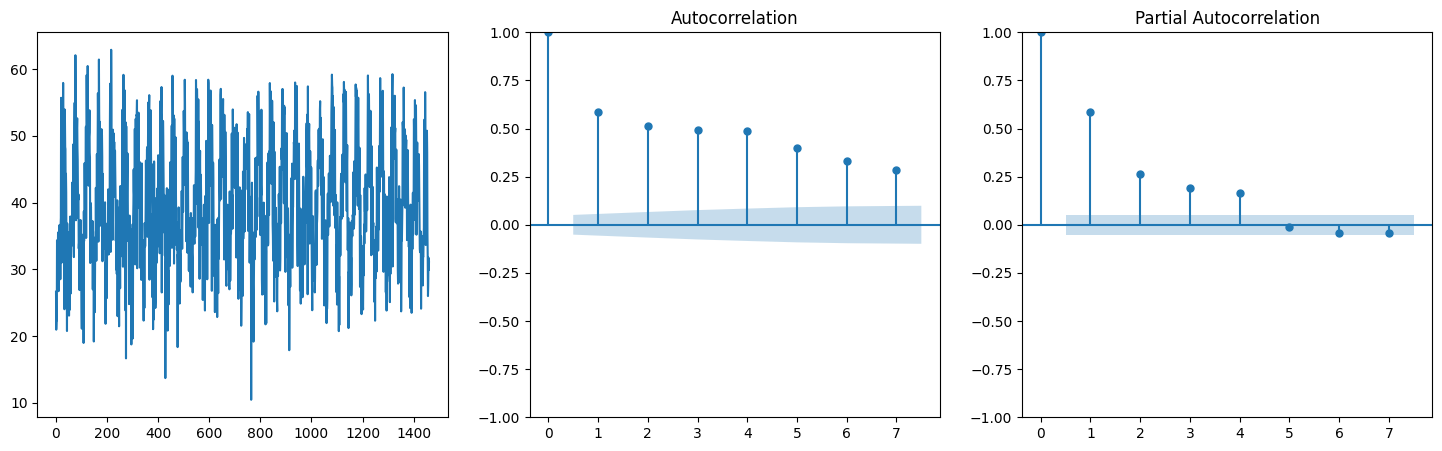

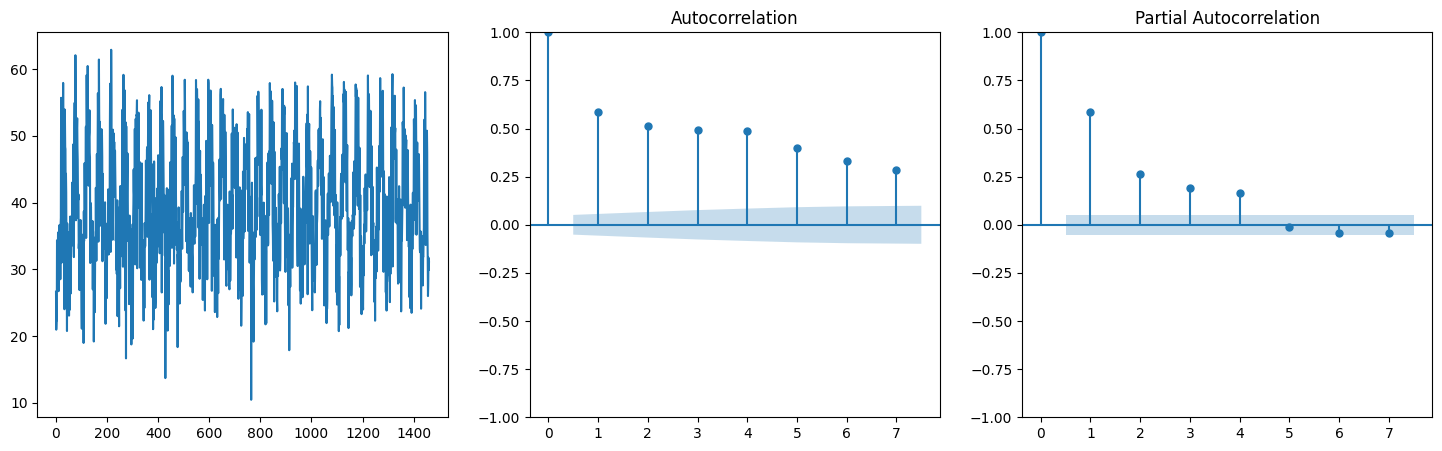

In [129]:
fig, axes = plt.subplots(1,3)
fig.set_size_inches(18, 5)
axes[0].plot([i for i in range(len(y))],y)
plot_acf(y,ax=axes[1],lags=7)
plot_pacf(y,method="ywm",lags=7,ax=axes[2])

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

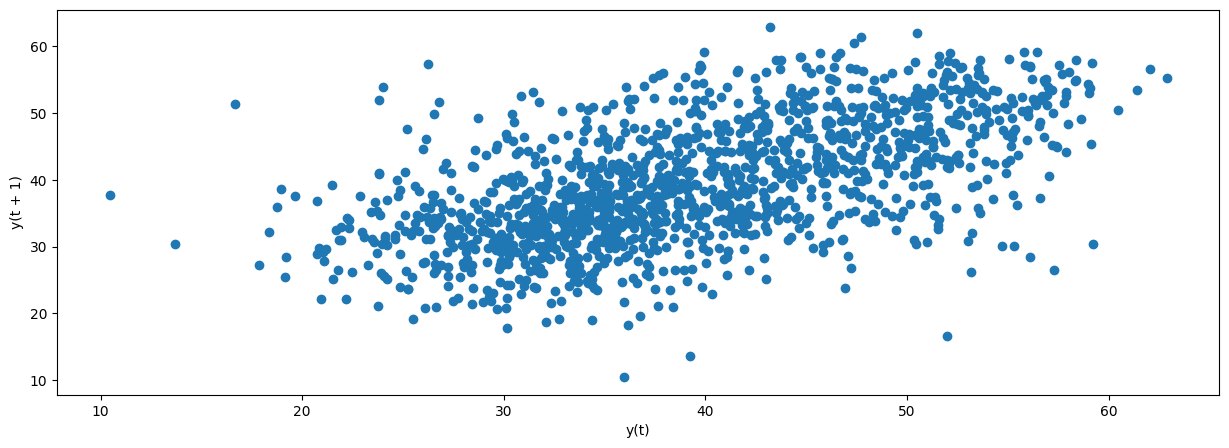

In [130]:
fig, axes = plt.subplots(1,1)
fig.set_size_inches(15, 5)
pd.plotting.lag_plot(Y["Consumo"], lag=1,ax=axes)

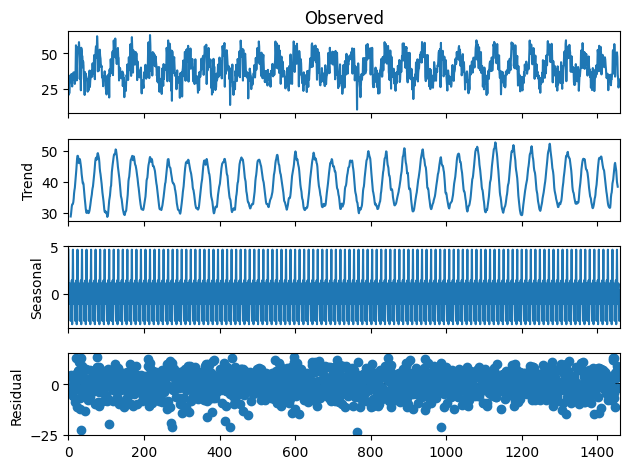

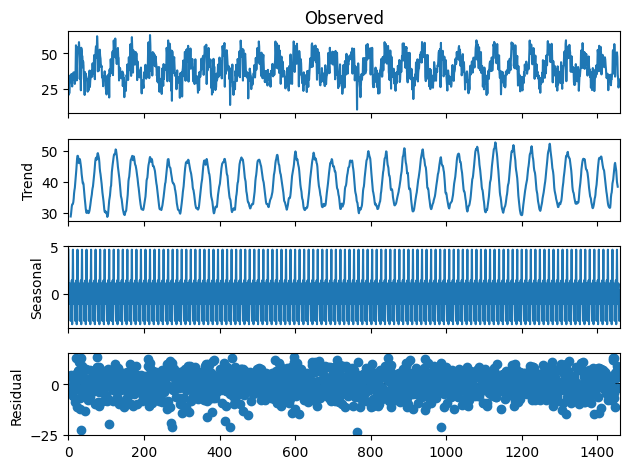

In [131]:
from statsmodels.tsa.seasonal import seasonal_decompose

result=seasonal_decompose(y,model="additive",period=12)
result.plot()

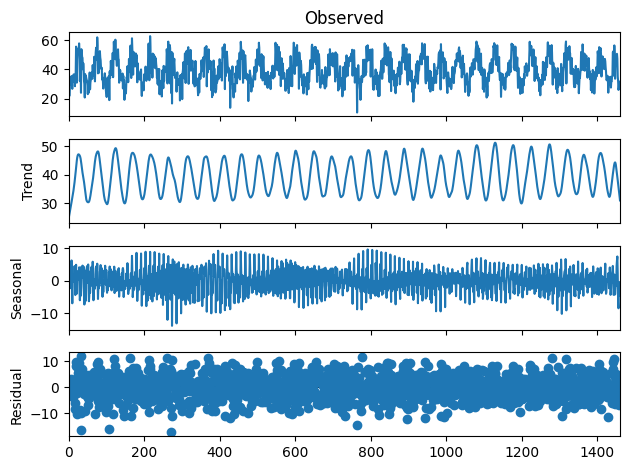

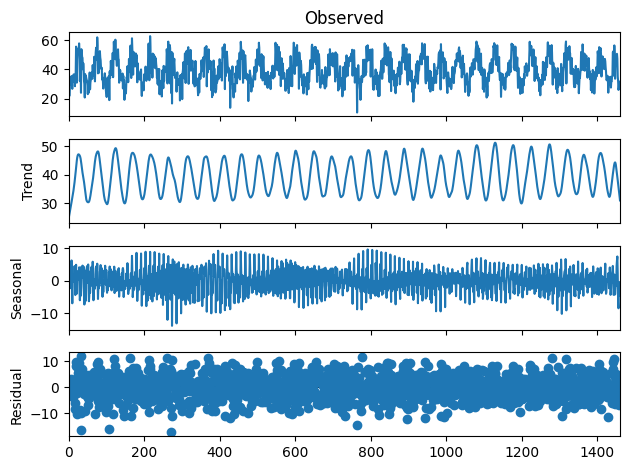

In [132]:
from statsmodels.tsa.seasonal import STL

stl = STL(y,period=12)
res_new = stl.fit()
res_new.plot()

In [133]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(y,maxlag=1)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -13.327087
p-value: 0.000000
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568


In [134]:
result = adfuller(y)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -15.630599
p-value: 0.000000
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568


In [56]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm

In [135]:
from pmdarima.arima import CHTest
from pmdarima.arima import nsdiffs

CHTest(m=12).estimate_seasonal_differencing_term(y)

1

In [136]:
x=[i for i in range(1,len(y)+1)]

In [195]:
x

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

In [137]:
xf=[i for i in range(len(y)+1,len(y)+len(t)+1)]

In [138]:
y.shape

(1461,)

MSE 36.95369279003603
AIC 9429.636855770701


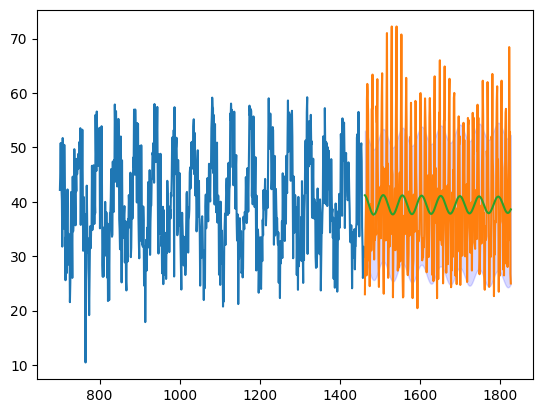

In [139]:
modelo1=ARIMA(y,order=(2,0,2))
m1=modelo1.fit()
m1_p = m1.get_forecast(steps=len(t))
m1_ci = m1_p.conf_int(0.05)
plt.plot(x[700:],y[700:],xf,t,xf,m1_p.predicted_mean)
plt.fill_between(xf, m1_ci[:,0], m1_ci[:,1], color='b', alpha=.15)
print("MSE",m1.mse)
print("AIC",m1.aic)

MSE 46.770516786805246
AIC 9771.013439724798


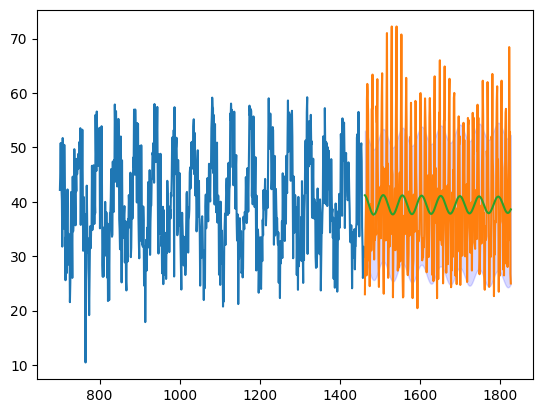

In [67]:
modelo2=ARIMA(y,order=(1,0,1))
m2=modelo2.fit()
m2_p = m2.get_forecast(steps=len(t))
m2_ci = m2_p.conf_int(0.05)
plt.plot(x[700:],y[700:],xf,t,xf,m1_p.predicted_mean)
plt.fill_between(xf, m1_ci[:,0], m1_ci[:,1], color='b', alpha=.15)
print("MSE",m2.mse)
print("AIC",m2.aic)

In [68]:
a = m2_p.predicted_mean.size
b = y.size
print(a, b, b-a)


365 1461 1096


In [69]:
from scipy.stats import pearsonr
print("correlacion con 2018-2020",pearsonr(y[1096:],m1_p.predicted_mean))
print("correlacion con 2022",pearsonr(t,m1_p.predicted_mean))

correlacion con 2018-2020 PearsonRResult(statistic=-0.1696810533114984, pvalue=0.001136875119312511)
correlacion con 2022 PearsonRResult(statistic=-0.002017615963770546, pvalue=0.969357343014141)


Inicio del RNN

In [70]:
import tensorflow as tf
from datetime import datetime
from tensorflow import keras
from keras.layers import SimpleRNN, Input, Dense
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam,SGD
import random as rd

In [71]:
import keras
from keras import layers
from sklearn.preprocessing import MinMaxScaler

In [169]:
model1 = keras.Sequential()
model1.add(Input(name="serie",shape=( 4,)))
model1.add(layers.Dense(256, activation="relu"))
model1.add(layers.Dense(313, activation="softmax"))
#model1.add(layers.Dense(1500, activation="sigmoid"))
model1.add(Dense(1, activation='linear'))
model1.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 256)            │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 313)            │        80,441 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │           314 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 82,035 (320.45 KB)

 Trainable params: 82,035 (320.45 KB)

 Non-trainable params: 0 (0.00 B)

In [171]:
opt = keras.optimizers.Adam(learning_rate=0.001)
model1.compile(loss='mse', optimizer=opt, metrics=['mse','mae','mape'])

In [142]:
Y.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1461 entries, 0 to 2310
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Subestacion  1461 non-null   object 
 1   Dia          1461 non-null   int32  
 2   Mes          1461 non-null   int32  
 3   Año          1461 non-null   int32  
 4   Consumo      1461 non-null   float64
dtypes: float64(1), int32(3), object(1)
memory usage: 51.4+ KB


In [76]:
Y1 = Y.drop(["Subestacion"],axis=1)

In [172]:
seed=211723

In [173]:
X_train, X_test, y_train, y_test = train_test_split(Y1, y, test_size=0.2, random_state=seed)

In [157]:
X_test

,Dia,Mes,Año,Consumo
2097,28,7,2021,50.858607
1085,15,4,2019,35.280928
731,10,8,2018,50.810956
371,5,11,2020,34.268303
795,11,6,2019,50.933430
...,...,...,...,...
1714,23,7,2019,57.550647
1271,17,9,2020,43.507911
920,13,2,2020,31.589185
1080,15,3,2021,32.667163


In [158]:
scaler = MinMaxScaler()
X_scaledTr = scaler.fit_transform(X_train)
X_scaledTe = scaler.fit_transform(X_test)

In [159]:
A = len(X_scaledTr)
print(A)

1168


In [160]:
len(y_train)

1168

In [174]:
model1.fit(X_scaledTr, y_train, epochs=200, batch_size=10)

Epoch 1/200
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1609.6871 - mae: 39.0801 - mape: 99.7201 - mse: 1609.6913
Epoch 2/200
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1577.1027 - mae: 38.6607 - mape: 98.5872 - mse: 1577.1063
Epoch 3/200
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1552.4050 - mae: 38.3397 - mape: 97.7193 - mse: 1552.4087
Epoch 4/200
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1532.2421 - mae: 38.0758 - mape: 97.0064 - mse: 1532.2460
Epoch 5/200
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1513.2578 - mae: 37.8257 - mape: 96.3309 - mse: 1513.2615
Epoch 6/200
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1494.8879 - mae: 37.5821 - mape: 95.6729 - mse: 1494.8918
Epoch 7/200
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1476.9325 - mae: 37.3424 - mape: 95.0257 - mse: 1476.9363
Epoch 8/200
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1459.2943 - mae: 37.1055 - mape: 94.3859 - mse: 1459.2980
Epoch 9/200
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/

In [168]:
model1.predict(X_scaledTr, batch_size=None, verbose="auto", steps=None, callbacks=None)

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[37.49093 ],
       [28.876202],
       [30.363918],
       ...,
       [41.574364],
       [41.57441 ],
       [27.479567]], dtype=float32)

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


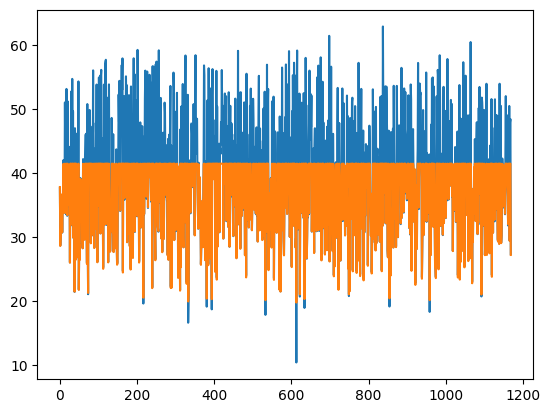

In [200]:
solucion = model1.predict(X_scaledTr)
import matplotlib.pyplot as plt
x=[i for i in range(1,len(X_train)+1)]
# Graficar los datos originales
plt.plot(x, X_train['Consumo'])

# Graficar la solución
plt.plot(x, solucion)
# Mostrar el gráfico
plt.show()